In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from new_queries import main_query, translation_table
from common_functions import open_connection, translate_products

### **Functions**

In [2]:
def missing_value_table(data):
    """Creating Summary Table for Missing Value in Dataset

    Creating Table containing total of missing value and its percentage
    of each feature/column on the dataset.

    Parameters
    ----------
    data : pandas.DataFrame
        The data we want to get the missing value

    Returns
    -------
    table : pandas.DataFrame
        Summary Table for Missing Value
    """
    
    missing_value_count = data.isna().sum()
    missing_value_percent = ((data.isna().sum()/data.count())*100).round(3)

    content = {
            "Missing Data": missing_value_count, 
            "Percentage (%)": missing_value_percent
        }

    table = pd.DataFrame(content)
    return table

In [49]:
import textwrap


def wrap_labels(ax, width, break_long_words=False):
    """Wrapping Graph xtick value"""
    
    labels = []
    for label in ax.get_xtick_labels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                    break_long_words=break_long_words))
    
    ax.set_xticklabels(labels, rotation=0)

### **Data Processing Setup**

In [4]:
connection = open_connection("olist.db")

Connection is successful


In [5]:
df_main = pd.read_sql(main_query, connection)

In [6]:
print(f"Dataset Shape: {df_main.shape}\n")
df_main.info()

Dataset Shape: (114092, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      114092 non-null  object 
 1   seller_id     113314 non-null  object 
 2   product_name  111702 non-null  object 
 3   price         113314 non-null  float64
 4   review_score  113131 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.4+ MB


### **Data Processing**

#### **Finding Missing Values**

In [7]:
missing_value_table(df_main)

,Missing Data,Percentage (%)
order_id,0,0.000
seller_id,778,0.687
product_name,2390,2.140
price,778,0.687
review_score,961,0.849


In [8]:
df_main[df_main["product_name"].isna()]

,order_id,seller_id,product_name,price,review_score
6,136cce7faa42fdb2cefd53fdc79a6098,dc8798cbf453b7e0f98745e396cc5616,None,49.90,2.0
122,bfe42c22ecbf90bc9f35cf591270b6a7,e5a3438891c0bfdb9394643f95273d8e,None,27.30,5.0
212,58ac1947c1a9067b9f416cba6d844a3f,520b493b57809f446cb0a233bb3e25c7,None,110.00,5.0
264,e22b71f6e4a481445ec4527cb4c405f7,6cd68b3ed6d59aaa9fece558ad360c0a,None,22.50,4.0
303,a094215e786240fcfefb83d18036a1cd,c826c40d7b19f62a09e2d7c5e7295ee2,None,122.99,5.0
...,...,...,...,...,...
113871,aaab15da689073f8f9aa978a390a69d1,None,None,NaN,1.0
113903,3a3cddda5a7c27851bd96c3313412840,None,None,NaN,5.0
113991,a89abace0dcc01eeb267a9660b5ac126,None,None,NaN,4.0
113992,a69ba794cc7deb415c3e15a0a3877e69,None,None,NaN,1.0


In [9]:
# Check the missing value on the initial table in the database
product_table_query = """
SELECT
    product_id,
    product_category_name as product_name
FROM olist_products_dataset
"""
df_product_table = pd.read_sql(product_table_query, connection)

df_product_table[df_product_table["product_name"].isna()]

,product_id,product_name
105,a41e356c76fab66334f36de622ecbd3a,None
128,d8dee61c2034d6d075997acef1870e9b,None
145,56139431d72cd51f19eb9f7dae4d1617,None
154,46b48281eb6d663ced748f324108c733,None
197,5fb61f482620cb672f5e586bb132eae9,None
...,...,...
32515,b0a0c5dd78e644373b199380612c350a,None
32589,10dbe0fbaa2c505123c17fdc34a63c56,None
32616,bd2ada37b58ae94cc838b9c0569fecd8,None
32772,fa51e914046aab32764c41356b9d4ea4,None


In [10]:
df_main[df_main["price"].isna()]

,order_id,seller_id,product_name,price,review_score
306,8e24261a7e58791d10cb1bf9da94df5c,None,None,NaN,1.0
673,c272bcd21c287498b4883c7512019702,None,None,NaN,3.0
798,37553832a3a89c9b2db59701c357ca67,None,None,NaN,1.0
857,d57e15fb07fd180f06ab3926b39edcd2,None,None,NaN,1.0
1304,00b1cb0320190ca0daa2c88b35206009,None,None,NaN,1.0
...,...,...,...,...,...
113871,aaab15da689073f8f9aa978a390a69d1,None,None,NaN,1.0
113903,3a3cddda5a7c27851bd96c3313412840,None,None,NaN,5.0
113991,a89abace0dcc01eeb267a9660b5ac126,None,None,NaN,4.0
113992,a69ba794cc7deb415c3e15a0a3877e69,None,None,NaN,1.0


In [11]:
df_main.dropna(inplace=True)

missing_value_table(df_main)

,Missing Data,Percentage (%)
order_id,0,0.0
seller_id,0,0.0
product_name,0,0.0
price,0,0.0
review_score,0,0.0


#### **Finding Duplicates**

In [12]:
n_duplicates = df_main.duplicated(keep=False).sum()

print("Number of Duplicates: ", n_duplicates)
df_main[df_main.duplicated(keep=False)]

Number of Duplicates:  19486


,order_id,seller_id,product_name,price,review_score
10,e6ce16cb79ec1d90b1da9085a6118aeb,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,99.00,1.0
11,e6ce16cb79ec1d90b1da9085a6118aeb,001cca7ae9ae17fb1caed9dfb1094831,ferramentas_jardim,99.00,1.0
54,9faeb9b2746b9d7526aef5acb08e2aa0,f7ba60f8c3f99e7ee4042fdef03b70c4,esporte_lazer,60.00,1.0
55,9faeb9b2746b9d7526aef5acb08e2aa0,f7ba60f8c3f99e7ee4042fdef03b70c4,esporte_lazer,60.00,1.0
60,66e4624ae69e7dc89bd50222b59f581f,db4350fd57ae30082dec7acbaacc17f9,telefonia,22.99,1.0
...,...,...,...,...,...
114044,b3112ca67f3afd4e20cf2ee91fc4f804,5b0cc932433fa5184b5b94bfe6bcc256,moveis_quarto,95.00,2.0
114062,e8fd20068b9f7e6ec07068bb7537f781,218d46b86c1881d022bce9c68a7d4b15,esporte_lazer,356.00,4.0
114063,e8fd20068b9f7e6ec07068bb7537f781,218d46b86c1881d022bce9c68a7d4b15,esporte_lazer,356.00,4.0
114089,11c177c8e97725db2631073c19f07b62,a1043bafd471dff536d0c462352beb48,informatica_acessorios,179.99,2.0


In [13]:
# Removing duplicates
df_main.drop_duplicates(keep="first", inplace=True)

# Re-check duplicates
n_duplicates = df_main.duplicated(keep=False).sum()

print("Number of Duplicates: ", n_duplicates)
df_main[df_main.duplicated(keep=False)]

Number of Duplicates:  0


,order_id,seller_id,product_name,price,review_score


#### **Handling Outliers**

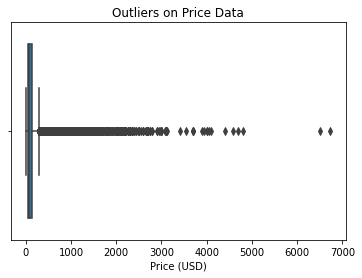

In [14]:
# Create Boxplot
sns.boxplot(x=df_main["price"])

#Modify Graph Info
plt.title("Outliers on Price Data")
plt.xlabel("Price (USD)")
plt.show()

In [15]:
# Check the 1.5IQR Rule
q1 = df_main["price"].quantile(.25)
q3 = df_main["price"].quantile(.75)
iqr = q3 - q1

lower_iqr = df_main["price"] < q1 - 1.5*iqr
upper_iqr = df_main["price"] > q3 + 1.5*iqr

outliers = df_main[lower_iqr | upper_iqr]

print("Number of Outliers: ", outliers["price"].count())
print("Total of Datapoints: ", df_main["price"].count())
print("Outliers to Total Data Percentage: "\
      + f"{round((outliers['price'].count()/df_main['price'].count())*100, 3)}%")

Number of Outliers:  7548
Total of Datapoints:  99349
Outliers to Total Data Percentage: 7.597%


In [16]:
# Check the 1.5IQR Rule
q1 = df_main["price"].quantile(.25)
q3 = df_main["price"].quantile(.75)
iqr = q3 - q1

lower_iqr = df_main["price"] < q1 - 1.5*iqr
upper_iqr = df_main["price"] > q3 + 1.5*iqr

outliers = df_main[lower_iqr | upper_iqr]

new_outliers_value = df_main["price"].median()

df_main.loc[lower_iqr | upper_iqr, "price"] = new_outliers_value
df_main[lower_iqr | upper_iqr]["price"].head()

40    79.0
43    79.0
56    79.0
66    79.0
70    79.0
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

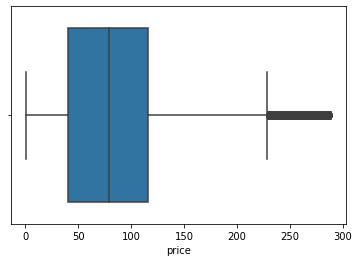

In [17]:
sns.boxplot(x=df_main["price"])

#### **Formatting Data**

In [18]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99349 entries, 0 to 114091
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      99349 non-null  object 
 1   seller_id     99349 non-null  object 
 2   product_name  99349 non-null  object 
 3   price         99349 non-null  float64
 4   review_score  99349 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.5+ MB


In [19]:
# Change review_score data type to integer
df_main["review_score"] = df_main["review_score"].astype(int)

# Check data type changes
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99349 entries, 0 to 114091
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      99349 non-null  object 
 1   seller_id     99349 non-null  object 
 2   product_name  99349 non-null  object 
 3   price         99349 non-null  float64
 4   review_score  99349 non-null  int32  
dtypes: float64(1), int32(1), object(3)
memory usage: 4.2+ MB


##### Translating Product From Portuguese to English

In [20]:
# Checking Table
df_main.head()

,order_id,seller_id,product_name,price,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,29.99,4
1,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,perfumaria,118.70,4
2,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,automotivo,159.90,5
3,949d5b44dbf5de918fe9c16f97b45f8a,66922902710d126a0e7d26b0e3805106,pet_shop,45.00,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2c9e548be18521d1c43cde1c582c6de8,papelaria,19.90,5


In [21]:
df_translation_table = pd.read_sql(translation_table, connection)
translation_map = translate_products(df_translation_table)

df_main.replace(translation_map, inplace=True)
df_main.head()

,order_id,seller_id,product_name,price,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,3504c0cb71d7fa48d967e0e4c94d59d9,Housewares,29.99,4
1,53cdb2fc8bc7dce0b6741e2150273451,289cdb325fb7e7f891c38608bf9e0962,Perfumery,118.70,4
2,47770eb9100c2d0c44946d9cf07ec65d,4869f7a5dfa277a7dca6462dcf3b52b2,Auto,159.90,5
3,949d5b44dbf5de918fe9c16f97b45f8a,66922902710d126a0e7d26b0e3805106,Pet shop,45.00,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2c9e548be18521d1c43cde1c582c6de8,Stationery,19.90,5


In [22]:
# Re-checking the translated products
products = df_main["product_name"].unique()
not_translated = [product for product in products if "_" in product]
not_translated

['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']

In [23]:
# Adding unformatted and not translated data
translation_map["pc_gamer"] = "PC Gamer" 
translation_map["portateis_cozinha_e_preparadores_de_alimentos"] = "Kitchen and Food Preparation racks"

# Replacing unformatted and not translated data
df_main["product_name"].replace(translation_map, inplace=True)

# Re-checking the 
products = df_main["product_name"].unique()
not_translated = [product for product in products if "_" in product]
not_translated

[]

In [124]:
seller_id = df_main["seller_id"].unique()
seller_name = [f"sellers {i}" for i, _ in enumerate(seller_id)]

new_seller_id = dict(zip(seller_id, seller_name))

df_main.replace(new_seller_id, inplace=True)
df_main.head()

,order_id,seller_id,product_name,price,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,sellers 0,Housewares,29.99,4
1,53cdb2fc8bc7dce0b6741e2150273451,sellers 1,Perfumery,118.70,4
2,47770eb9100c2d0c44946d9cf07ec65d,sellers 2,Auto,159.90,5
3,949d5b44dbf5de918fe9c16f97b45f8a,sellers 3,Pet shop,45.00,5
4,ad21c59c0840e6cb83a9ceb5573f8159,sellers 4,Stationery,19.90,5


### **Data Analysis**

#### **Use Case 1: Which products are ordered the most and the least?**

In [30]:
df_ordered_products = df_main[
        ["product_name", "order_id"]].groupby("product_name").agg("count")

df_ordered_products.head()

,order_id
product_name,
Agro industry and commerce,183
Air conditioning,250
Art,200
Arts and craftmanship,24
Audio,348


In [31]:
df_ordered_products.reset_index(inplace=True)
df_ordered_products.rename(columns={"order_id": "order_counts"}, inplace=True)

df_ordered_products.head()

,product_name,order_counts
0,Agro industry and commerce,183
1,Air conditioning,250
2,Art,200
3,Arts and craftmanship,24
4,Audio,348


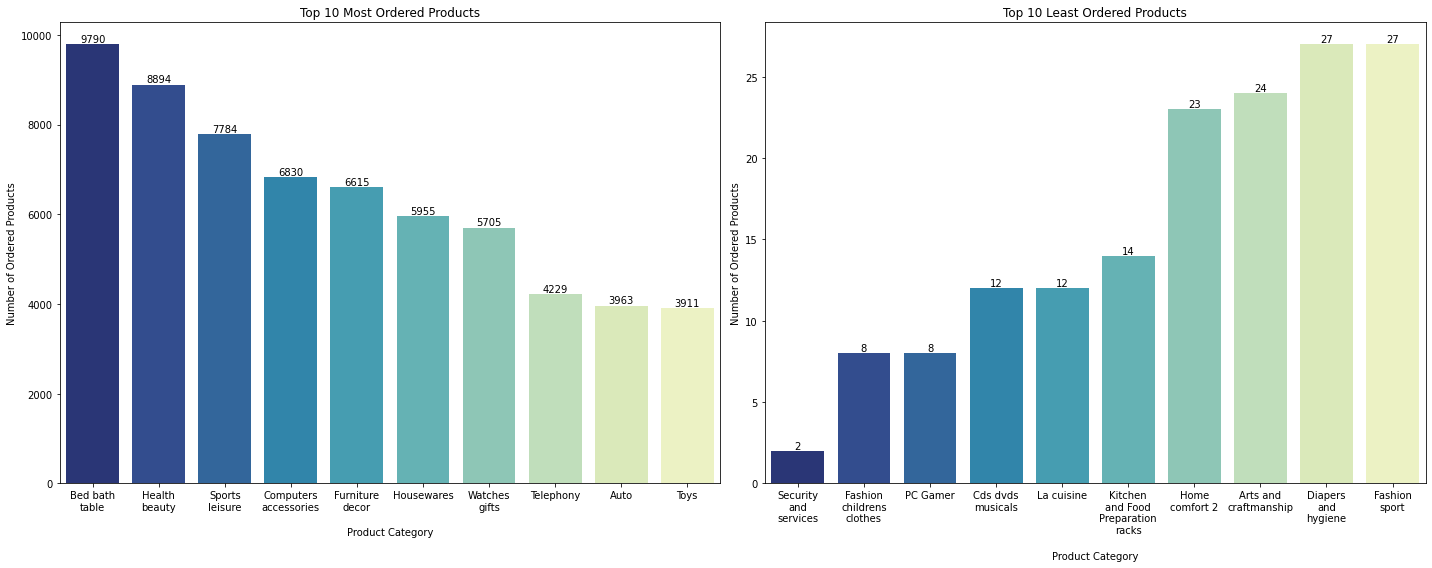

In [64]:
# Setup the Matplotlib Axes

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

for i, _ in enumerate(axes):
    if (i == 0):
        # set the most ordered products
        data = df_ordered_products.sort_values("order_counts",
                                               ascending=False)
        bar_title = "Top 10 Most Ordered Products"
    elif (i == 1):
        data = df_ordered_products.sort_values("order_counts")
        bar_title = "Top 10 Least Ordered Products"

    sns.barplot(x="product_name", y="order_counts", ax=axes[i],
                palette="YlGnBu_r", data=data[:10])

    wrap_labels(axes[i], 10)
    axes[i].bar_label(axes[i].containers[0])
    axes[i].title.set_text(bar_title)
    axes[i].set_xlabel("\nProduct Category")
    axes[i].set_ylabel("Number of Ordered Products")

plt.tight_layout()
plt.show()



In [78]:
df_ordered_products.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_counts,73.0,1360.945205,2293.162905,2.0,76.0,243.0,1289.0,9790.0


#### **Use Case 2: How Does the Revenue Generated by Each Ordered Products**

In [133]:
df_pricing = df_main[
        ["product_name", "price"]
    ].groupby("product_name").agg("sum").reset_index()

df_pricing

,product_name,price
0,Agro industry and commerce,14502.33
1,Air conditioning,28867.29
2,Art,17051.27
3,Arts and craftmanship,1603.52
4,Audio,29409.61
...,...,...
68,Stationery,199938.61
69,Tablets printing image,6152.63
70,Telephony,210809.30
71,Toys,342571.45


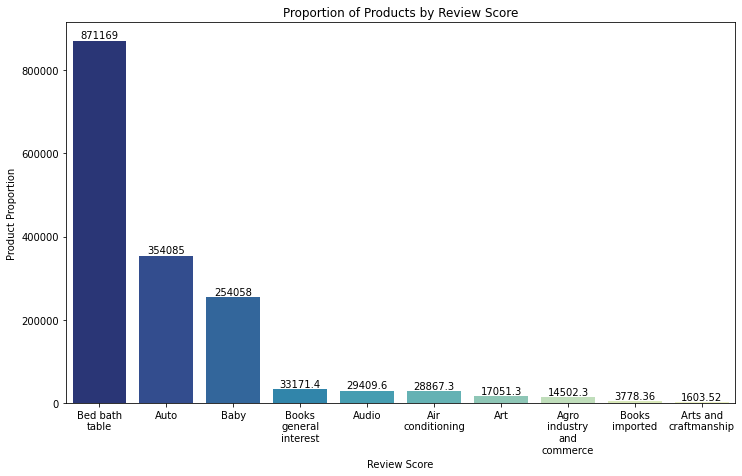

In [137]:
# Create chart
plt.figure(figsize=(12, 7))

ax = sns.barplot(x="product_name", 
                 y="price",
                 palette="YlGnBu_r", 
                 data=df_pricing[:10],
                 order=df_pricing[:10]
                       .sort_values("price", 
                                     ascending=False).product_name)  
# Adding data label into the graph
wrap_labels(ax, 10)
plt.bar_label(ax.containers[0])

# Adding table name and axes labels
plt.title("Proportion of Products by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Product Proportion")
plt.show()

#### **Use Case 3: How Does the Proportion of Review Score of the Ordered Products?**

In [110]:
df_review = df_main[["product_name", "review_score"]]
df_review.head()

,order_id,product_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,Housewares,4
1,53cdb2fc8bc7dce0b6741e2150273451,Perfumery,4
2,47770eb9100c2d0c44946d9cf07ec65d,Auto,5
3,949d5b44dbf5de918fe9c16f97b45f8a,Pet shop,5
4,ad21c59c0840e6cb83a9ceb5573f8159,Stationery,5


In [111]:
df_review_proportion = df_review.groupby("review_score").agg("count")
df_review_proportion.head()

,order_id,product_name
review_score,,
1,11395,11395
2,3271,3271
3,8319,8319
4,19123,19123
5,57241,57241


In [112]:
df_review_proportion.reset_index(inplace=True)
df_review_proportion.head()

,review_score,order_id,product_name
0,1,11395,11395
1,2,3271,3271
2,3,8319,8319
3,4,19123,19123
4,5,57241,57241


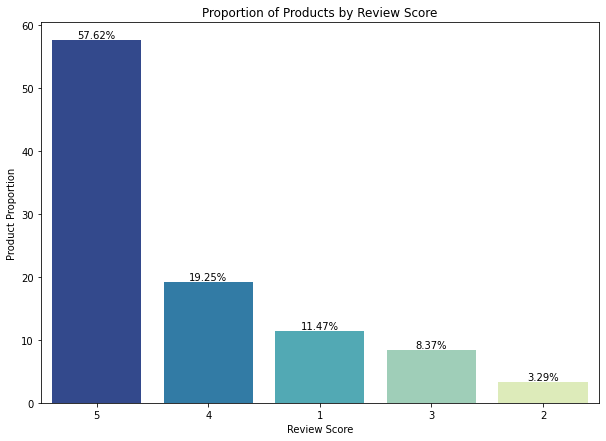

In [113]:
# Set percentage column on the data frame
percentages = (df_review_proportion["product_name"]\
              / df_review_proportion["product_name"].sum())\
              * 100

df_review_proportion["percentages"] = percentages

# Create chart
plt.figure(figsize=(10, 7))

ax = sns.barplot(x="review_score", 
                 y="percentages",
                 palette="YlGnBu_r", 
                 data=df_review_proportion,
                 order=df_review_proportion
                       .sort_values("percentages", 
                                     ascending=False).review_score)  
# Adding data label into the graph
plt.bar_label(ax.containers[0], fmt="%.2f%%")

# Adding table name and axes labels
plt.title("Proportion of Products by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Product Proportion")
plt.show()

In [117]:
df_product_review = df_review.groupby(["review_score", "product_name"]).agg("count")
df_product_review

order_id
review_score product_name                        
1            Agro industry and commerce        21
             Air conditioning                  34
             Art                               25
             Arts and craftmanship              3
             Audio                             58
...                                           ...
5            Stationery                      1462
             Tablets printing image            41
             Telephony                       2222
             Toys                            2420
             Watches gifts                   3246

[348 rows x 1 columns]

In [120]:
df_product_review.reset_index(inplace=True)
df_product_review.rename(columns={"order_id": "product_counts"})

df_product_review.head()

,review_score,product_name,order_id
0,1,Agro industry and commerce,21
1,1,Air conditioning,34
2,1,Art,25
3,1,Arts and craftmanship,3
4,1,Audio,58


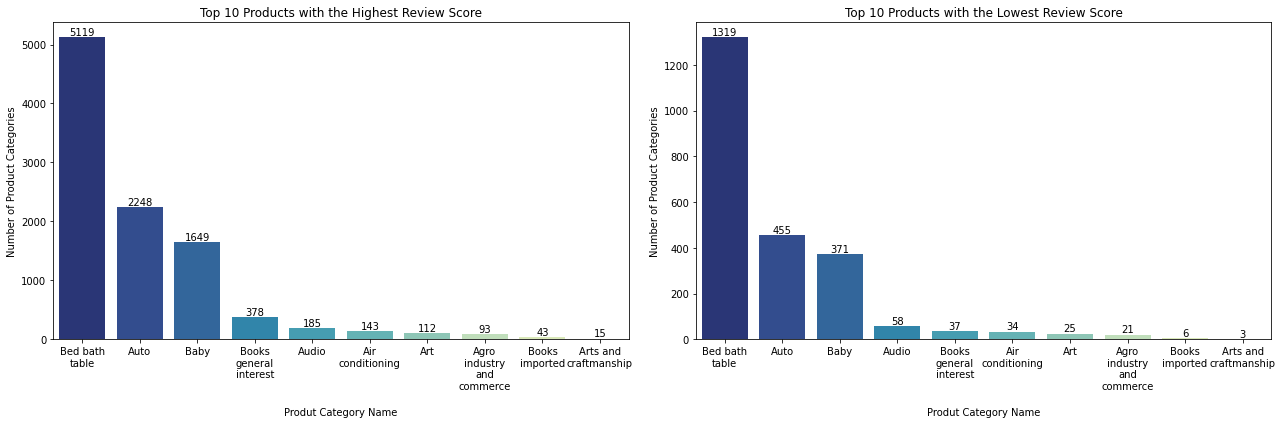

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i, _ in enumerate(axes):
      if i == 0:
            data = df_product_review[df_product_review["review_score"] == 5][:10]
            bar_title = "Top 10 Products with the Highest Review Score"
      elif i == 1:
            data = df_product_review[df_product_review["review_score"] == 1][:10]
            bar_title = "Top 10 Products with the Lowest Review Score"
      
      bar_plot = sns.barplot(x="product_name",
                             y="order_id",
                             ax=axes[i],
                             palette="YlGnBu_r",
                             data=data,
                             order=data.sort_values("order_id", 
                                                    ascending=False).product_name)

      wrap_labels(axes[i], 10)
      axes[i].bar_label(axes[i].containers[0])
      axes[i].title.set_text(bar_title)
      axes[i].set_xlabel("\nProdut Category Name")
      axes[i].set_ylabel("Number of Product Categories")

plt.tight_layout()